# Proyek Analisis Data: Bike-Sharing Dataset

- Name: Saepul Bahri
- Email: bahreesaepul1@gmail.com
- DicodingID: bahree36


## Menentukan Pertanyaan Bisnis

1. **How does daily weather conditions affect bike rentals?**

   - Purpose: Understanding the relationship between weather variables (e.g., temperature, humidity, wind speed, weather situation) and the number of bike rentals can help the business predict demand and optimize bike availability during different weather conditions.

2. **What are the peak hours or days for bike rentals, and how can bike availability be optimized?**
   - Purpose: By analyzing bike usage trends over different days of the week (weekday), times of day (hour), and seasons (season), the company can better allocate resources and bikes during peak demand periods.


## Import Semua Packages/Library yang Digunakan


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Data Gathering


In [28]:
# read the dataset

bike_day_data = pd.read_csv('data/bike_sharing_daily.csv')
bike_hour_data = pd.read_csv('data/bike_sharing_hourly.csv')

In [29]:
bike_day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
bike_hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- The first cell from the three cells above allows us to do the first important thing in data analysis. Which is loading the data.
- By using pandas (here abbvr. as 'pd') we load the data from csv file day.csv and hour.csv. Both of these file contains the bike sharing data daily and hourly respectively. Later both of thsese data will be loaded into DataFrame which will allows us to do further analysis.


### Assessing Data


In [31]:
# Show basic overview of both dataset
print('01 - BIKE DAY DATASET OVERVIEW')
bike_day_data.info()

01 - BIKE DAY DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [32]:
print('\n02 - BIKE HOUR DATASET OVERVIEW')
bike_hour_data.info()


02 - BIKE HOUR DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [33]:
# Check for duplicated data in both dataset
duplicate = bike_day_data[bike_day_data.duplicated()]
duplicate

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [34]:
duplicate = bike_hour_data[bike_hour_data.duplicated()]
duplicate

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


**Insight:**

- The codes in this assessing data segments are used to check the quality and characteristics of the data, which allows make decision on the step that need to be taken next.
- the info() gave use the overview of the dataset which shows that:
  - The bike_day_data consist of 731 entries with 0 null (all data are complete; no missinng value)
  - The bike_hour_data consist of 17379 entries with 0 null (all data are complete; no missing value)
- We also checked both dataset for duplicated data by using .duplicated(). As we can observes from there are no duplicate data in both of our datasets.
- **Because our datasets dos not have any missing values and duplicates thus cleaning (data dropping) the data is not needed.**


### Cleaning Data


In [35]:
# Normalize the columns name
column_mapping = {'dteday': 'date', 'mnth': 'month', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

bike_day_data.rename(columns=column_mapping, inplace=True)
bike_day_data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
# Normalize the columns name
column_mapping = {'dteday': 'date', 'mnth': 'month', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity'}

bike_hour_data.rename(columns=column_mapping, inplace=True)
bike_hour_data.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- **Because our datasets dos not have any missing values and duplicates thus cleaning (data dropping) the data is not needed. (Refers to [assesing data sections](#assessing-data))**
- In this process we coverted the name of the columns in both dataset to make it easier to read and process in further analysis.


## Exploraroty Data Analysis


### EDA - Bike Sharing Daily Data


In [37]:
bike_day_data.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


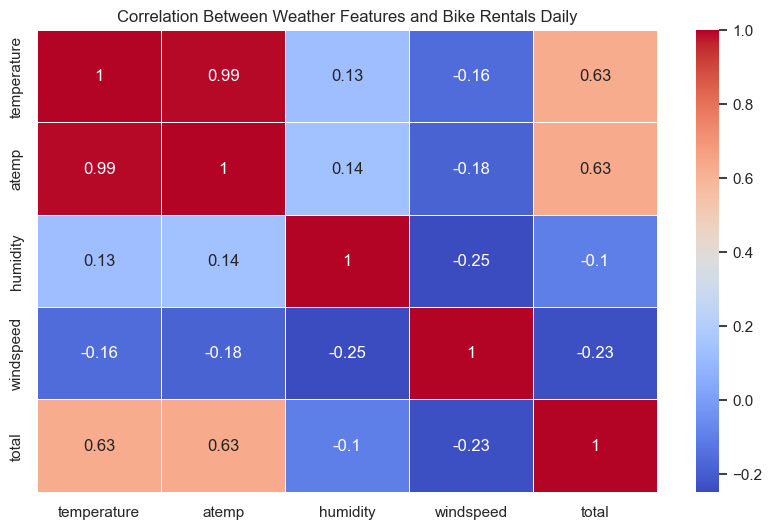

In [38]:
# Set up plot styles
sns.set_theme(style="whitegrid")

# 1. Correlation Heatmap between weather conditions and total rentals
plt.figure(figsize=(10, 6))
weather_features = ['temperature', 'atemp', 'humidity', 'windspeed']
correlation = bike_day_data[weather_features + ['total']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Weather Features and Bike Rentals Daily")
plt.show()

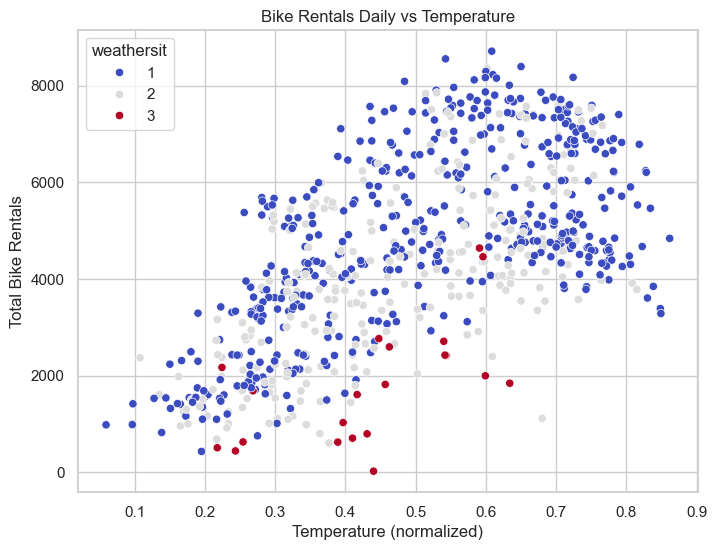

In [39]:
# 2. Scatter plot of temperature vs. total bike rentals
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='total', data=bike_day_data, hue='weathersit', palette='coolwarm')
plt.title("Bike Rentals Daily vs Temperature")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Total Bike Rentals")
plt.show()

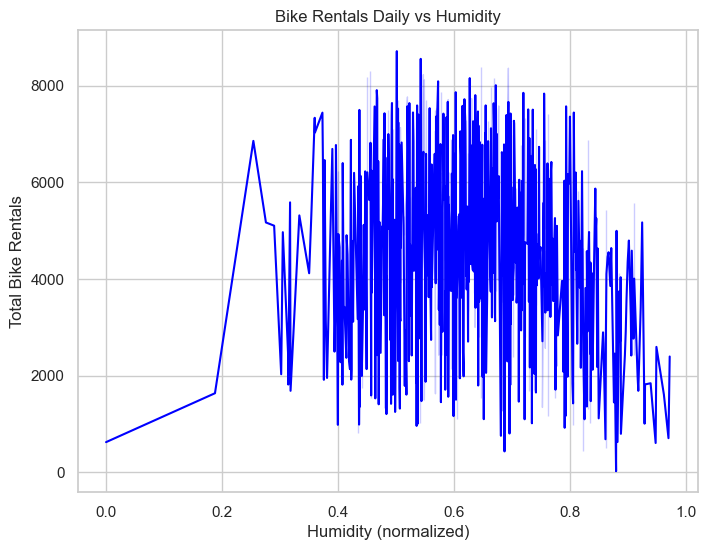

In [40]:
# 3. Line plot of total rentals over humidity levels
plt.figure(figsize=(8, 6))
sns.lineplot(x='humidity', y='total', data=bike_day_data, color='blue')
plt.title("Bike Rentals Daily vs Humidity")
plt.xlabel("Humidity (normalized)")
plt.ylabel("Total Bike Rentals")
plt.show()

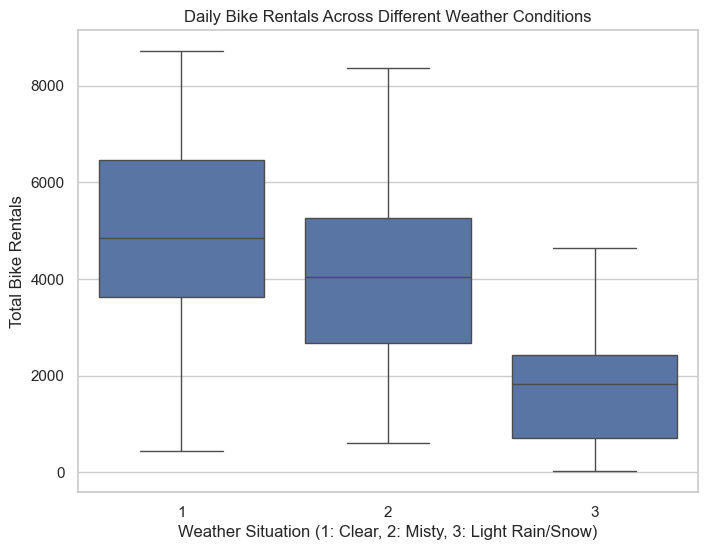

In [41]:
# 4. Box plot of bike rentals for different weather conditions
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='total', data=bike_day_data)
plt.title("Daily Bike Rentals Across Different Weather Conditions")
plt.xlabel("Weather Situation (1: Clear, 2: Misty, 3: Light Rain/Snow)")
plt.ylabel("Total Bike Rentals")
plt.show()

### EDA - Bike Sharing Hourly Data


In [42]:
bike_hour_data.describe()

,instant,season,year,month,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


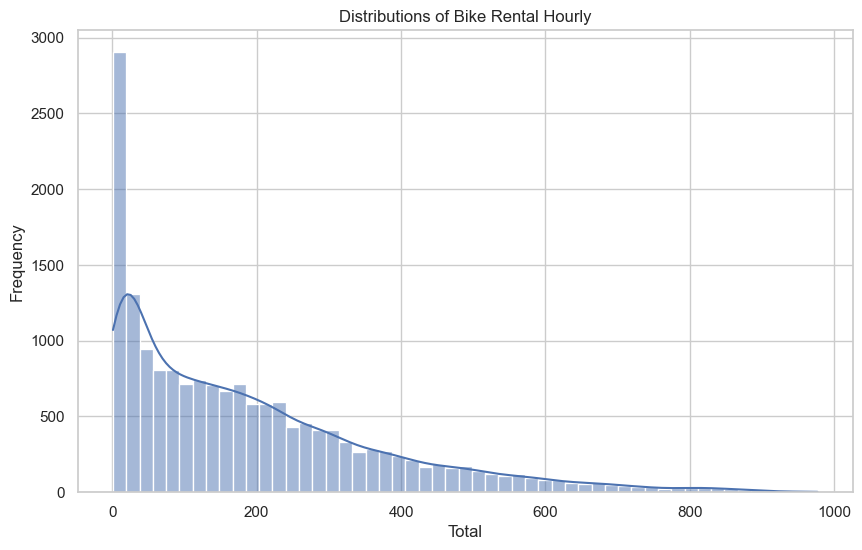

In [43]:
# Convert 'date' column to datetime if it's not already
bike_hour_data['date'] = pd.to_datetime(bike_hour_data['date'])

# Extract hour and weekday from the date
bike_hour_data['hr'] = bike_hour_data['date'].dt.hour
bike_hour_data['weekday'] = bike_hour_data['date'].dt.dayofweek  # Monday = 0, Sunday = 6

plt.figure(figsize=(10, 6))
sns.histplot(bike_hour_data['cnt'], kde=True)
plt.title("Distributions of Bike Rental Hourly")
plt.xlabel("Total")
plt.ylabel("Frequency")
plt.show()

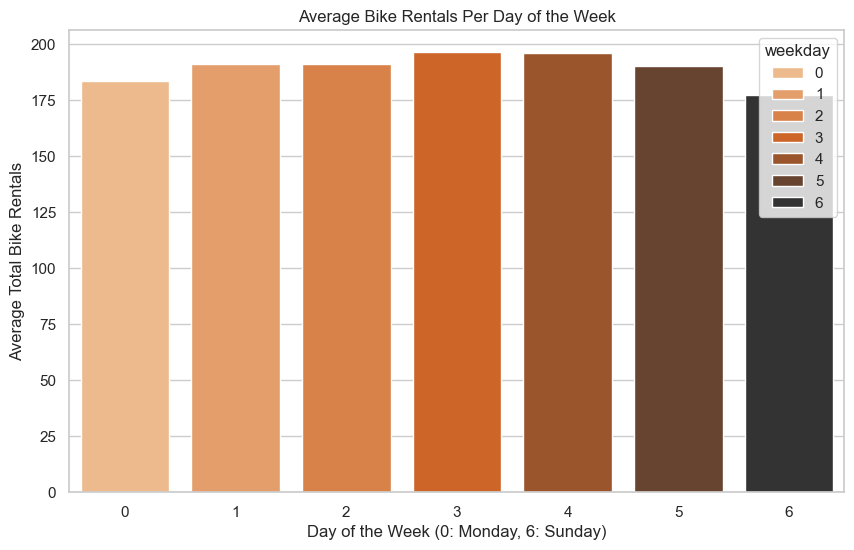

In [44]:
plt.figure(figsize=(10, 6))
weekday_rentals = bike_hour_data.groupby('weekday')['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', hue="weekday", data=weekday_rentals, palette='Oranges_d')
plt.title("Average Bike Rentals Per Day of the Week")
plt.xlabel("Day of the Week (0: Monday, 6: Sunday)")
plt.ylabel("Average Total Bike Rentals")
plt.show()

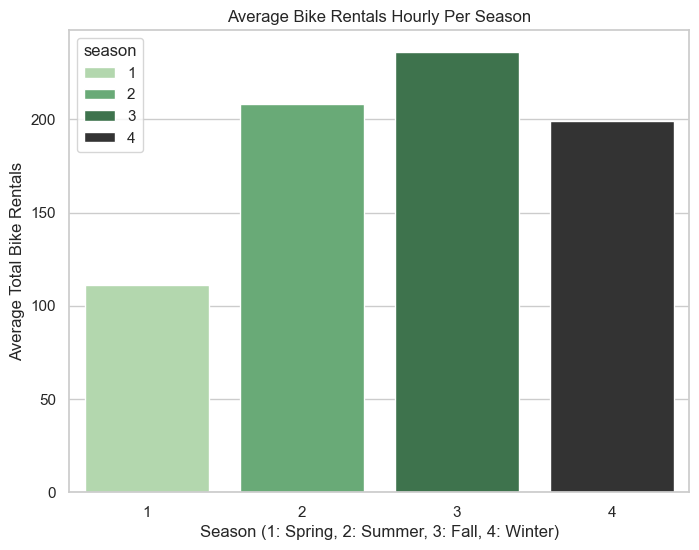

In [45]:
plt.figure(figsize=(8, 6))
season_rentals = bike_hour_data.groupby('season')['cnt'].mean().reset_index()
sns.barplot(x='season', y='cnt', hue='season', data=season_rentals, palette='Greens_d')
plt.title("Average Bike Rentals Hourly Per Season")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Average Total Bike Rentals")
plt.show()

**Insight:**

- In the EDA process we did several things: descriptive analysis, variable distributions, and correlations analysis.


## Visualizations & Explanatory Analysis


### Question 1

**How does daily weather conditions affect bike rentals?**

- Purpose: Understanding the relationship between weather variables (e.g., temperature, humidity, wind speed, weather situation) and the number of bike rentals can help the business predict demand and optimize bike availability during different weather conditions.


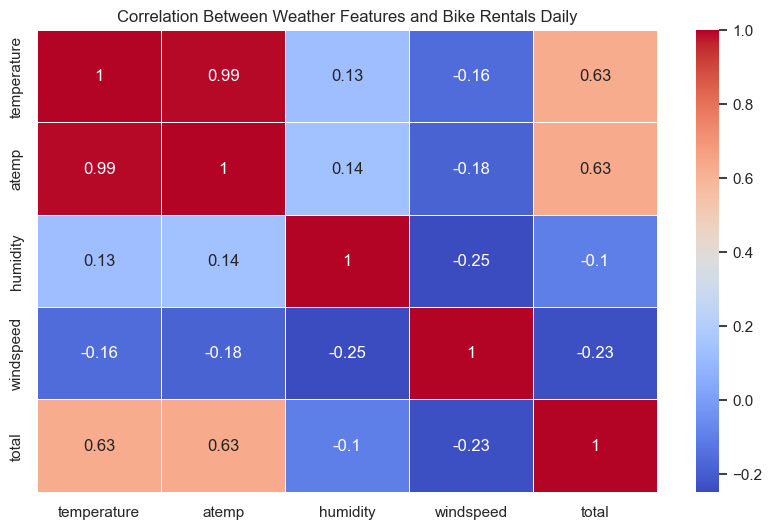

In [46]:
# Set up plot styles
sns.set_theme(style="whitegrid")

# 1. Correlation Heatmap between weather conditions and total rentals
plt.figure(figsize=(10, 6))
weather_features = ['temperature', 'atemp', 'humidity', 'windspeed']
correlation = bike_day_data[weather_features + ['total']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Weather Features and Bike Rentals Daily")
plt.show()

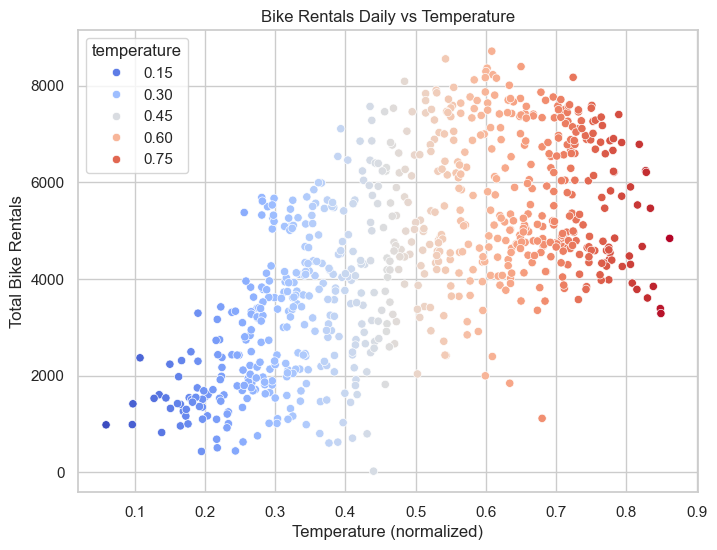

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='total', data=bike_day_data, hue='temperature', palette='coolwarm')
plt.title("Bike Rentals Daily vs Temperature")
plt.xlabel("Temperature (normalized)")
plt.ylabel("Total Bike Rentals")
plt.show()

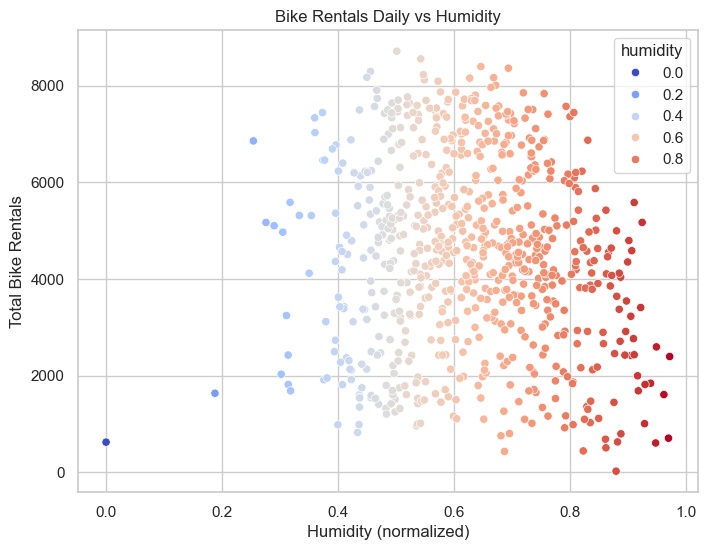

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity', y='total', data=bike_day_data, hue='humidity', palette='coolwarm')
plt.title("Bike Rentals Daily vs Humidity")
plt.xlabel("Humidity (normalized)")
plt.ylabel("Total Bike Rentals")
plt.show()

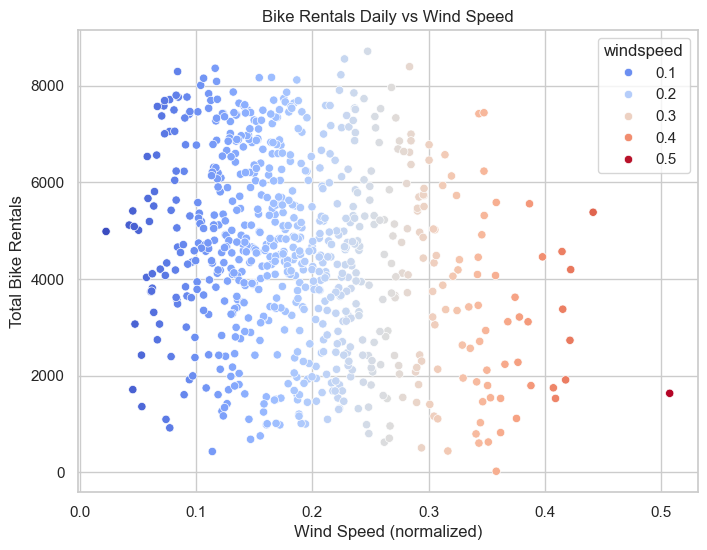

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='windspeed', y='total', data=bike_day_data, hue='windspeed', palette='coolwarm')
plt.title("Bike Rentals Daily vs Wind Speed")
plt.xlabel("Wind Speed (normalized)")
plt.ylabel("Total Bike Rentals")
plt.show()

> <br/>**Answer:** <br/><br/> The analysis reveals that warmer temperatures generally lead to more bike rentals, while higher humidity and wind speeds tend to decrease rentals. Warm weather encourages biking, whereas high humidity and windy conditions may make riding uncomfortable or unsafe.<br/><br/>


### Question 2

**What are the peak hours or days for bike rentals, and how can bike availability be optimized?**

- Purpose: By analyzing bike usage trends over different days of the week (weekday), times of day (hour), and seasons (season), the company can better allocate resources and bikes during peak demand periods.


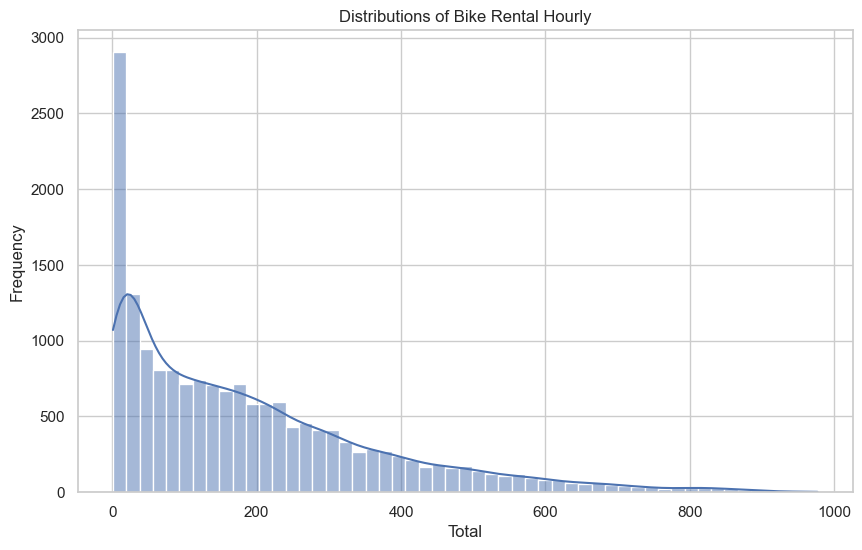

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(bike_hour_data['cnt'], kde=True)
plt.title("Distributions of Bike Rental Hourly")
plt.xlabel("Total")
plt.ylabel("Frequency")
plt.show()

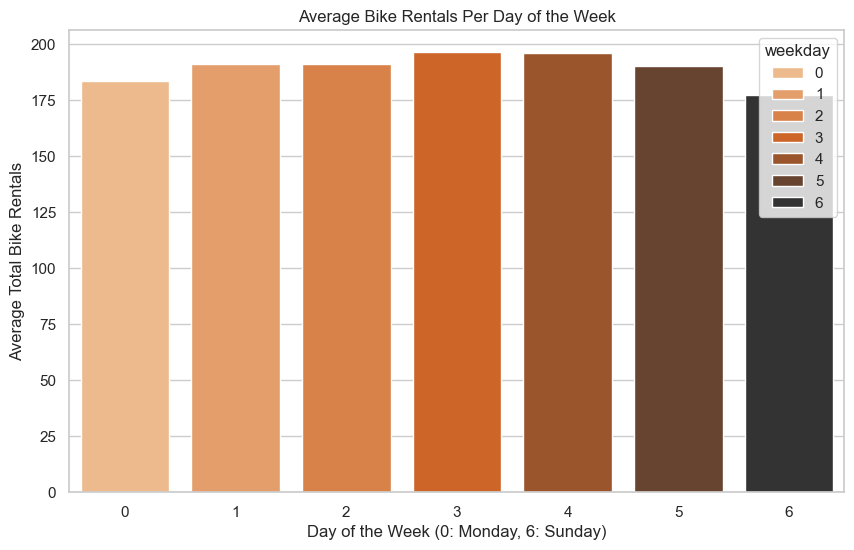

In [51]:
plt.figure(figsize=(10, 6))
weekday_rentals = bike_hour_data.groupby('weekday')['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', hue="weekday", data=weekday_rentals, palette='Oranges_d')
plt.title("Average Bike Rentals Per Day of the Week")
plt.xlabel("Day of the Week (0: Monday, 6: Sunday)")
plt.ylabel("Average Total Bike Rentals")
plt.show()

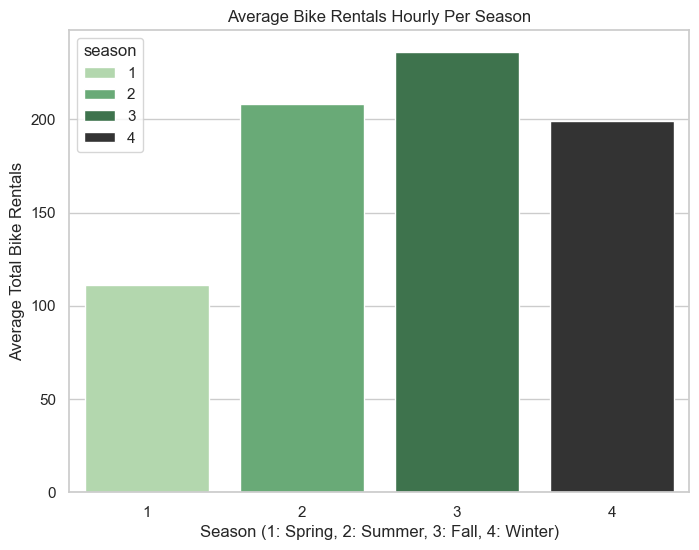

In [52]:
plt.figure(figsize=(8, 6))
season_rentals = bike_hour_data.groupby('season')['cnt'].mean().reset_index()
sns.barplot(x='season', y='cnt', hue='season', data=season_rentals, palette='Greens_d')
plt.title("Average Bike Rentals Hourly Per Season")
plt.xlabel("Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Average Total Bike Rentals")
plt.show()

> <br/>**Answer:** <br/><br/> The analysis reveals the frequency of bike rentals are much higher in falls, this maybe caused by the drop in temprature and humidity which makes biking much more enjoyable while in the other hands there are far less bike rental in spring compared to others seasons, this maybe caused by very low temprature in the early spring thus makes people prefer to use another mode of transportations.<br/><br/>


## Analisis Lanjutan (Opsional)


## Conclusions


> <br/>**01** - Weather does have a signifiants effect on bike rental, with warmer temperature and humidity caused the amount of bike rentals to go up. While in the other hand if the temprature and humidity is too high or too low, bike rentals goes down.<br/><br/> **02** - The analysis reveals the frequency of bike rentals are much higher in falls, this maybe caused by the drop in temprature and humidity which makes biking much more enjoyable. Additionaly, the increase in bike rentals need a serious attentions for the company to manage their stocks to meet the high demands.<br/><br/>
